In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [9]:
dfins = pd.read_csv(r"C:\Users\DELL\Downloads\insurance.csv")

In [11]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
dfins.shape

(1338, 7)

### NAN

In [18]:
dfins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Error Detection

<Axes: >

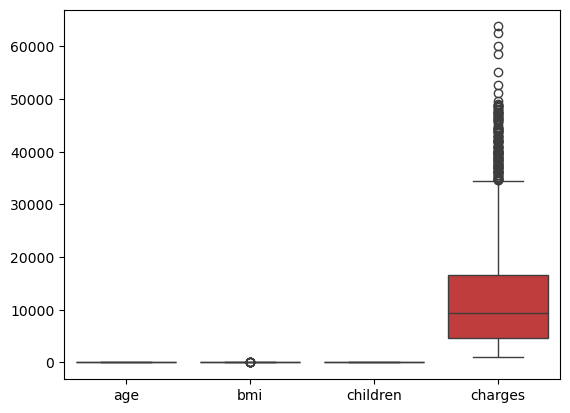

In [23]:
sns.boxplot(dfins)

In [25]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
dfins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [29]:
dfins["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [31]:
dfins["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [33]:
dfins["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [35]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
ohe = OneHotEncoder(drop = "first")

In [67]:
ohe

OneHotEncoder(drop='first')

In [69]:
ohe.fit(dfins[["sex","smoker", "region"]])

OneHotEncoder(drop='first')

In [71]:
ohe.transform(dfins[["sex","smoker", "region"]])

<1338x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1964 stored elements in Compressed Sparse Row format>

In [73]:
ary = ohe.transform(dfins[["sex","smoker", "region"]]).toarray()

In [75]:
ary

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [77]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [79]:
ary.shape

(1338, 5)

In [85]:
dfenc = pd.DataFrame(ary, dtype = "int", columns = ['male', 'yes','northwest', 'southeast', 'southwest'])

In [87]:
dfenc

,male,yes,northwest,southeast,southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [89]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
dfins = pd.concat([dfins,dfenc], axis = 1)

In [95]:
dfins

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [97]:
dfins.drop(["sex", "smoker","region"],axis = 1)

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [99]:
dfins.drop(["sex", "smoker","region"],axis = 1, inplace = True)

In [101]:
dfins

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


### Data Separation

In [111]:
x = dfins.drop("charges", axis = 1)

In [113]:
x

,age,bmi,children,male,yes,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [117]:
y= dfins["charges"]

In [119]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [155]:
x.shape

(1338, 8)

In [157]:
x_train.shape

(1070, 8)

In [159]:
x_test.shape

(268, 8)

In [161]:
y_train.shape

(1070,)

In [163]:
y_test.shape

(268,)

In [131]:
from sklearn.linear_model import LinearRegression

In [133]:
lreg = LinearRegression()

In [135]:
lreg

LinearRegression()

In [143]:
lreg.fit(x_train, y_train)

LinearRegression()

In [145]:
lreg.score(x_test, y_test)

0.7835929767120724

In [151]:
sc_list = []
for i in range(1,500):
    xtrain, xtest,ytrain, ytest = train_test_split(x,y,test_size = 0.20, random_state = i)
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    s = lreg.score(xtest, ytest)
    sc_list.append(s)

m = max(sc_list)
print(m)
print(sc_list.index(m))

0.8346887772049044
366
